In [27]:
import pandas as pd
import datetime as dt
import yfinance as y
import matplotlib.pyplot as plt

In [30]:


def downlaod_stocks_data(ticker, start, end):
    df = y.download(ticker, start=start, end = end)

    
    
    return df


df = downlaod_stocks_data('AAPL', '2000-01-01', '2025-12-31')


[*********************100%***********************]  1 of 1 completed


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6538 entries, 2000-01-03 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   6538 non-null   float64
 1   (High, AAPL)    6538 non-null   float64
 2   (Low, AAPL)     6538 non-null   float64
 3   (Open, AAPL)    6538 non-null   float64
 4   (Volume, AAPL)  6538 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 306.5 KB


In [32]:
df.head(5)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2000-01-03,0.839281,0.843498,0.762428,0.786328,535796800
2000-01-04,0.768521,0.829440,0.758680,0.811633,512377600
2000-01-05,0.779767,0.828971,0.772270,0.777893,778321600
2000-01-06,0.712287,0.802260,0.712287,0.795700,767972800
2000-01-07,0.746027,0.757274,0.716037,0.723534,460734400


In [33]:
def validate_data(data):
    validation_report={
        'total_rows': len(data),
        'total_cols': len(data.columns),
        'missing_values': data.isnull().sum().to_dict()
    }
    return validation_report

report = validate_data(df)
print(f'Data Validation report \n {report}')

Data Validation report 
 {'total_rows': 6538, 'total_cols': 5, 'missing_values': {('Close', 'AAPL'): 0, ('High', 'AAPL'): 0, ('Low', 'AAPL'): 0, ('Open', 'AAPL'): 0, ('Volume', 'AAPL'): 0}}


In [ ]:
train = df[(df.index.year < 2024) & (df.index.year >= 2000)]
test = df[df.index.year >= 2024]

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5284 entries, 2000-01-03 to 2020-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   5284 non-null   float64
 1   (High, AAPL)    5284 non-null   float64
 2   (Low, AAPL)     5284 non-null   float64
 3   (Open, AAPL)    5284 non-null   float64
 4   (Volume, AAPL)  5284 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 247.7 KB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2021-01-04 to 2025-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1254 non-null   float64
 1   (High, AAPL)    1254 non-null   float64
 2   (Low, AAPL)     1254 non-null   float64
 3   (Open, AAPL)    1254 non-null   float64
 4   (Volume, AAPL)  1254 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


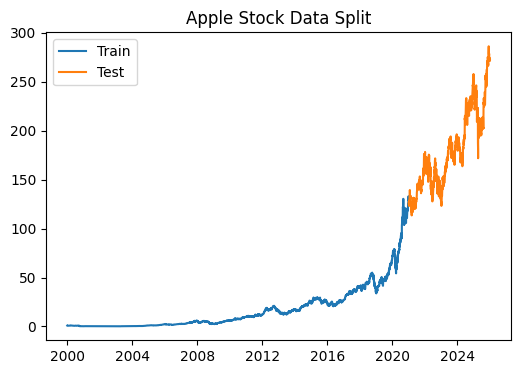

In [44]:
plt.figure(figsize=(6,4))
plt.plot(train['Close'], label = 'Train')
plt.plot(test['Close'], label = 'Test')
plt.legend()
plt.title('Apple Stock Data Split')
plt.show()